## Prediciton of Breast cancer

In [1]:
# drop down library
from ipywidgets import interact

def myfunction(x):
    return x
interact(myfunction,x=['red','green'])

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv('data1.csv',names= ['Sample code number','Clump Thickness','Uniformity of Cell Size',
                         'Uniformity of Cell Shape','Marginal Adhesion',
                         'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                         'Normal Nucleoli','Mitoses','Class'])
df.set_index('Sample code number')

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4


In [3]:
# print("Cancer data set dimensions : {}".format(data.shape))
df.shape

(683, 11)

In [4]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [6]:
df.columns


Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
df['Class'].unique()

array([2, 4], dtype=int64)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of Benign:  444
Number of Malignant :  239


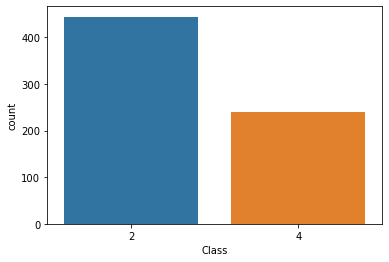

In [8]:
ax = sns.countplot(df['Class'],label="Count")
B, M = df['Class'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)


In [9]:
df.shape

(683, 11)

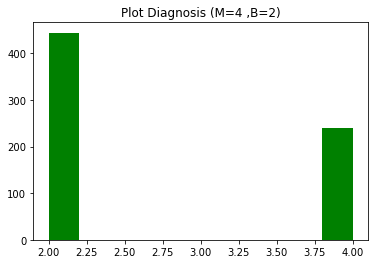

In [10]:
plt.hist(df['Class'],color='g')
plt.title('Plot Diagnosis (M=4 ,B=2)')
plt.show()

In [11]:
df['Class'].unique()

array([2, 4], dtype=int64)

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)


In [13]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,4,1,1,1,2,1,3,1,1,2
1,1002945,4,4,4,5,7,10,3,2,1,2
2,1015425,2,1,1,1,2,2,3,1,1,2
3,1016277,5,8,8,1,3,4,3,7,1,2
4,1017023,3,1,1,3,2,1,3,1,1,2


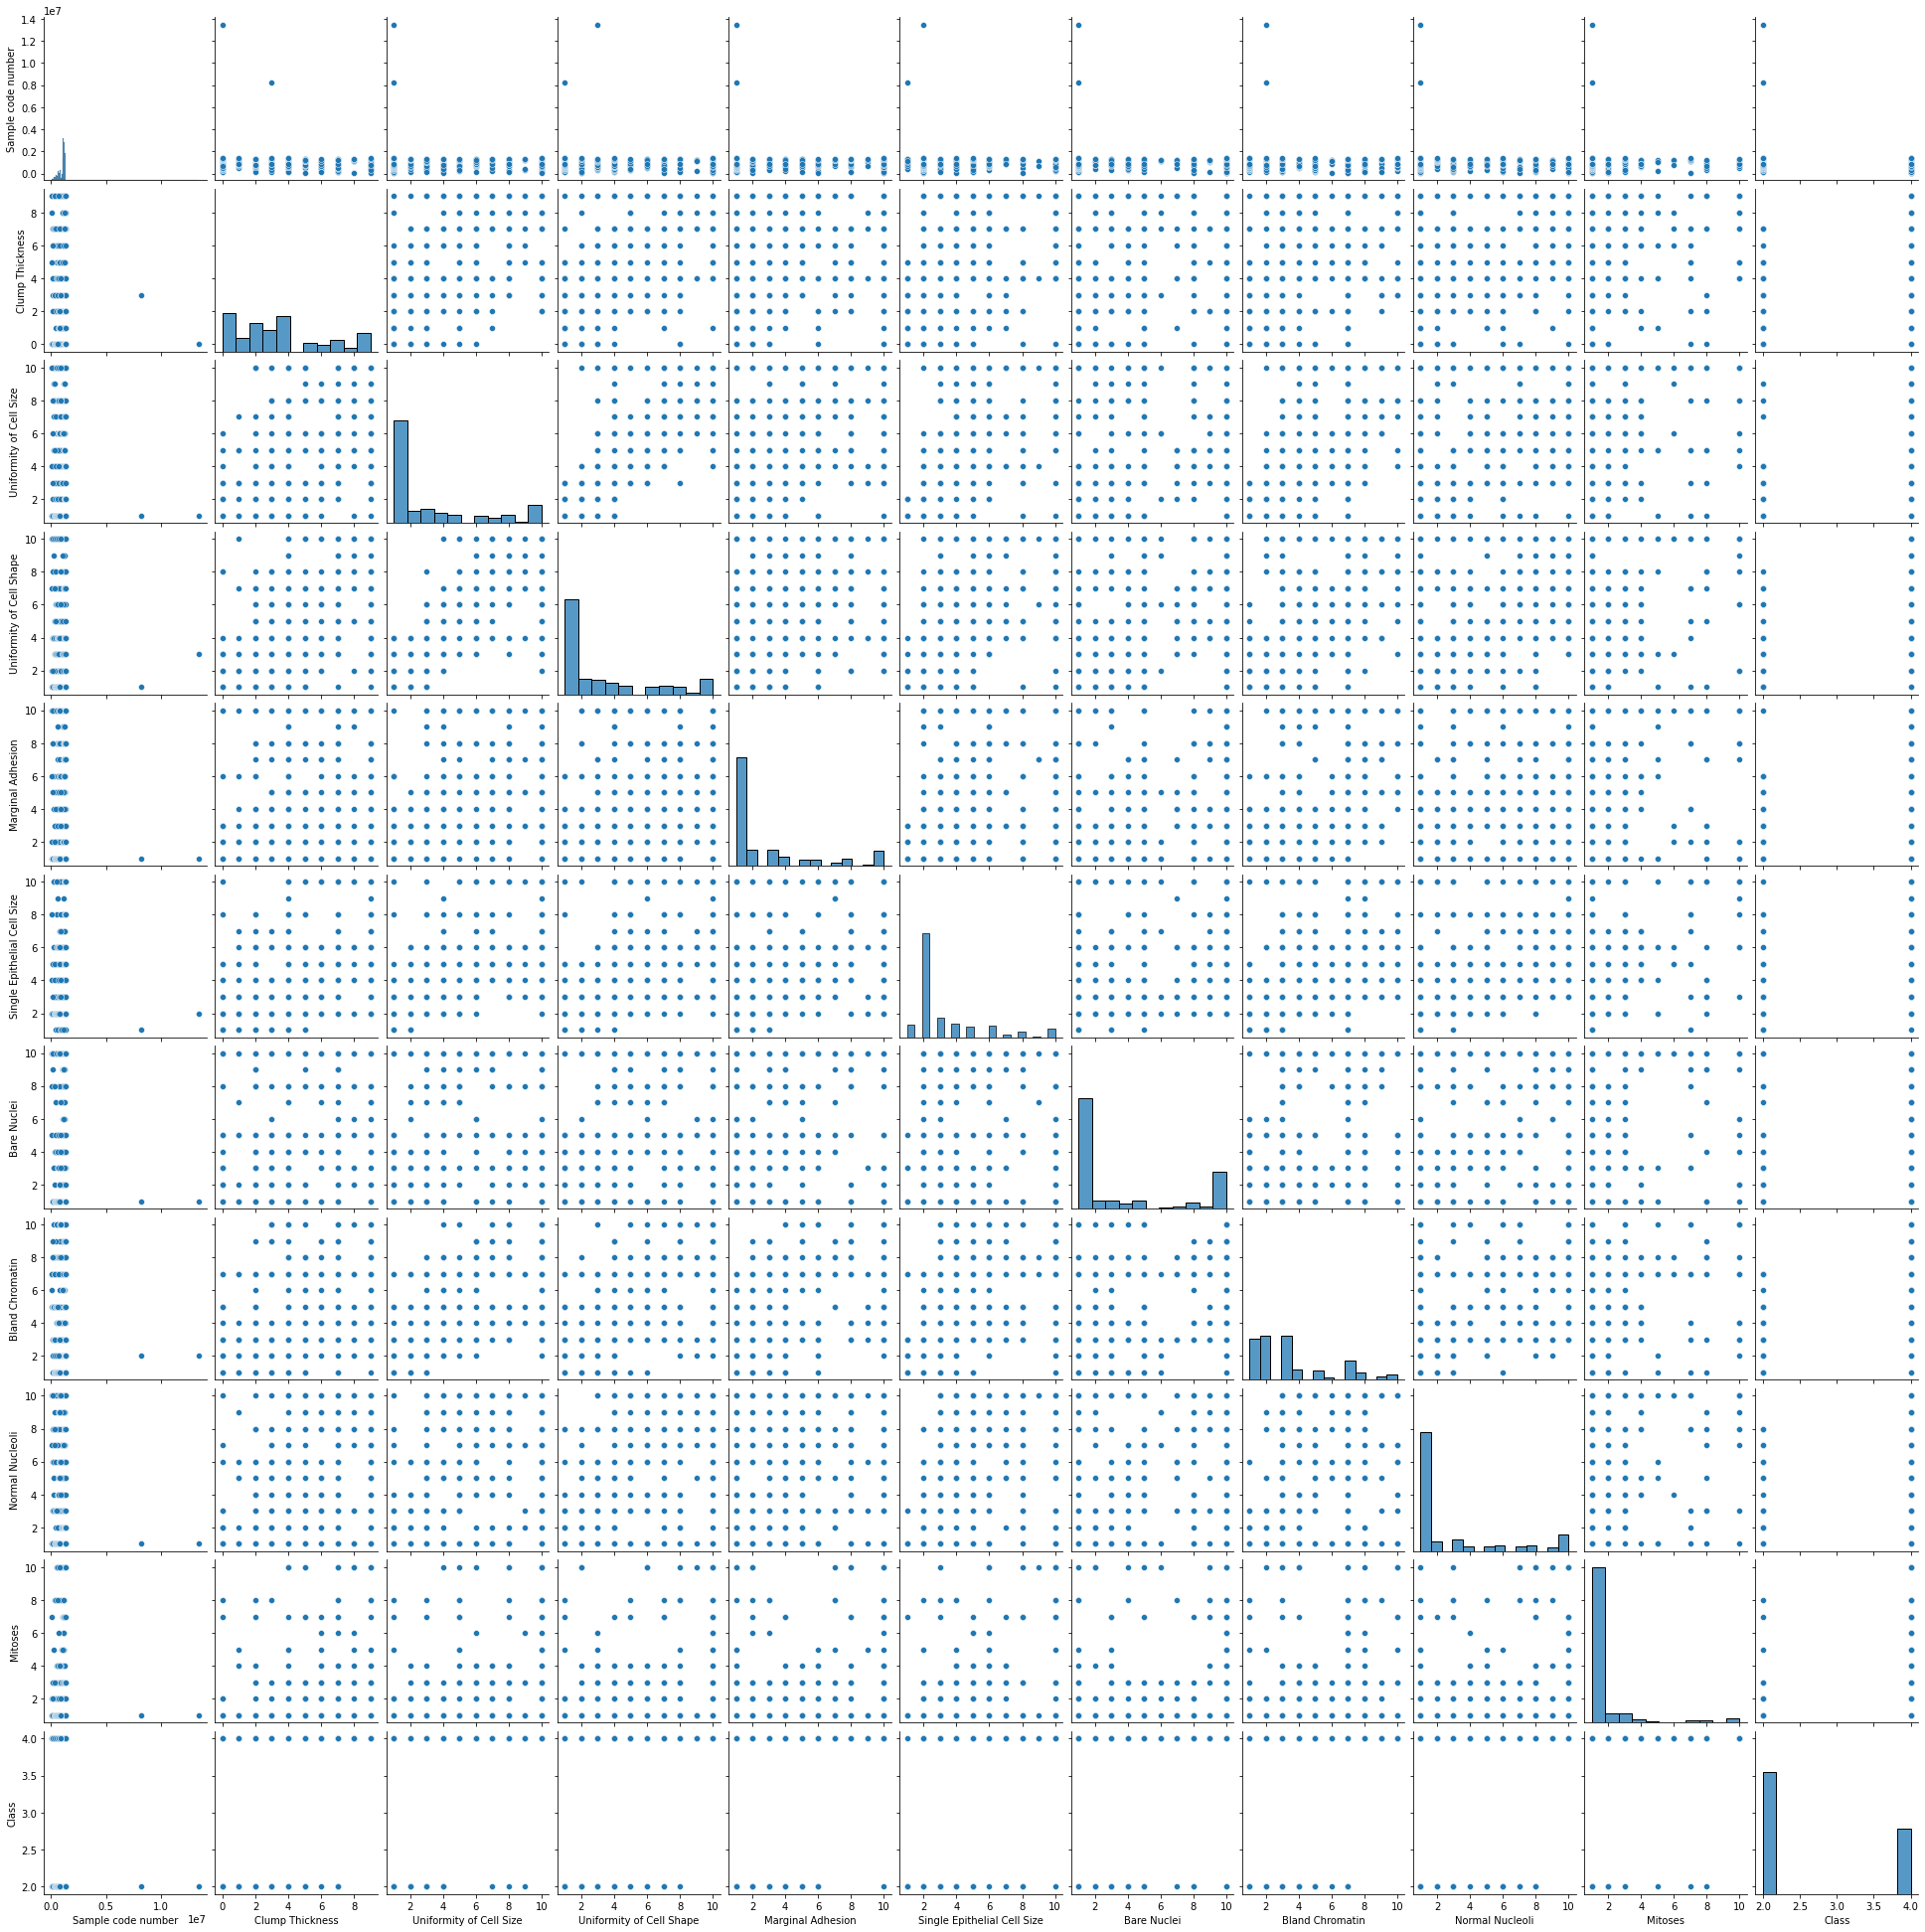

In [15]:
sns.pairplot(df)

In [17]:
X=df.iloc[:,0:9].values
Y=df.iloc[:,10].values
print(X)
print(Y)

[[1000025       4       1 ...       1       3       1]
 [1002945       4       4 ...      10       3       2]
 [1015425       2       1 ...       2       3       1]
 ...
 [ 888820       4      10 ...       3       8      10]
 [ 897471       3       8 ...       4      10       6]
 [ 897471       3       8 ...       5      10       4]]
[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
def models(X_train,Y_train):
    #LogisticRegression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
#DecisionTree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
#RandomForest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    print("[0]LogisticRegression :",log.score(X_train,Y_train))
    print("[1]DecisionTree :",tree.score(X_train,Y_train))
    print("[2]RandomForest :",forest.score(X_train,Y_train))
    return log,tree,forest

In [41]:
model=models(X_train,Y_train)

[0]LogisticRegression : 0.9769874476987448
[1]DecisionTree : 1.0
[2]RandomForest : 1.0


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
for i in range(len(model)):
    print("Model",i)
    print(classification_report (Y_test, model[i].predict(X_test)))
    print('Accuracy: ',accuracy_score (Y_test, model[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           2       0.94      0.97      0.95       130
           4       0.94      0.89      0.92        75

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205

Accuracy:  0.9414634146341463
Model 1
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       130
           4       0.94      0.88      0.91        75

    accuracy                           0.94       205
   macro avg       0.94      0.92      0.93       205
weighted avg       0.94      0.94      0.94       205

Accuracy:  0.9365853658536586
Model 2
              precision    recall  f1-score   support

           2       0.95      0.97      0.96       130
           4       0.95      0.92      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95 

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


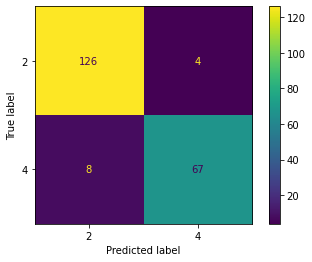

In [52]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)
Y_preds=log.predict(X_test)
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix 
plot_confusion_matrix (log ,X_test,Y_test, values_format = 'd')
conf = metrics.confusion_matrix(Y_test, Y_preds)
conf

In [35]:
TP = true_pos = 126
TN = true_neg = 67
FP = false_pos = 4
FN = false_neg = 8
results = {}
metric = "Accuracy of LogisticRegression"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

Accuracy of LogisticRegression is  0.941


In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)
Y_preds=tree.predict(X_test)
conf = metrics.confusion_matrix(Y_test, Y_preds)
conf

array([[126,   4],
       [  9,  66]], dtype=int64)

In [47]:
TP = true_pos = 126
TN = true_neg = 66
FP = false_pos = 4
FN = false_neg = 9
results = {}
metric = "Accuracy of DecisionTree"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

Accuracy of DecisionTree is  0.937


In [48]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
Y_preds=forest.predict(X_test)
conf = metrics.confusion_matrix(Y_test, Y_preds)
conf

array([[126,   4],
       [  6,  69]], dtype=int64)

In [49]:
TP = true_pos = 126
TN = true_neg = 69
FP = false_pos = 4
FN = false_neg = 6
results = {}
metric = "Accuracy of RandomForest"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

Accuracy of RandomForest is  0.951
